Baysian estimate 可视化

In [18]:
import numpy as np
rng = np.random.RandomState(42)

In [ ]:
class BayesianLinearRegression:
    def __init__(self, alpha1=1.0, alpha2=1.0, lambda1=1.0, lambda2=1.0, max_iter=100, tol=1e-6):
        """
        初始化贝叶斯线性回归
        alpha1, alpha2: alpha的Gamma先验参数
        lambda1, lambda2: lambda的Gamma先验参数
        max_iter: 最大迭代次数
        tol: 收敛阈值
        """
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.max_iter = max_iter
        self.tol = tol
    def fit(self,X,y):
        """
        拟合模型
        X: 训练数据 (n_samples, n_features)
        y: 目标值 (n_samples,)
        """
        N,M = X.shape
        # 初始化超参数
        self.alpha_ = 1.0
        self.lambda_ = 1.0

        for it in range(self.max_iter):
            old_alpha = self.alpha_
            old_lambda = self.lambda_
            # 计算w后验分布的协方差和均值
            self.Sigma = np.linalg.inv(
                self.alpha * X.T @ X + self.lambda_ * np.eye(M)
            )
            self.mu = self.alpha * self.Sigma @ X.T @ y

            # 更新 alpha
            self.alpha_ = N / (
                np.sum((y - X@self.mu)**2) + np.trace(self.Sigma@X.T @ X)
            )
            
            # 更新 lambda
            self.lambda_ = M  / (
                self.mu.T @ self.mu + np.trace(self.Sigma)
            )
            # 检查收敛
            if (abs(self.alpha_ - old_alpha) < self.tol and 
               abs(self.lambda_ - old_lambda) < self.tol):
                print(f"Converged after {iteration + 1} iterations")
                break


In [21]:
# 高维球面线性
n_samples, n_features = 100,10
X = rng.randn(n_samples, n_features)
true_w = rng.randn(n_features)
y = X @ true_w + rng.normal(0, 0.1, n_samples)

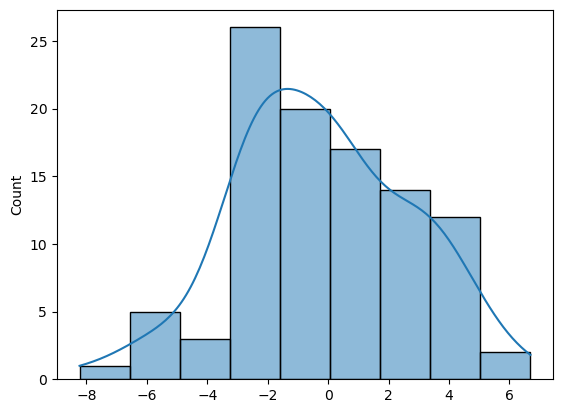

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot (y, kde=True)


(100,)